## Part 1

### Loading the datasets
#### 1. Confirmed URL : https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv
#### 2. Deaths URL: https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv
#### 3. Recovered URL: https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv

#### Starting date on all three datasets is 22/01/2020

Steps (Without BeautifulSoup):-
1. Import the CSV 
2. Check if the last column title matches with the last date row in the cleaned dataset.
3. If it matches, don't add it to the dataset. 
4. If it does not match, go back iteratively until it matches and save all of the data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
import requests
from bs4 import BeautifulSoup
from datetime import date
today = date.today()

Using TensorFlow backend.


In [2]:
confirmed_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
recovered_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

In [3]:
d1 = today.strftime("%m/%d/%y").replace(' 0', ' ')
d1

'05/21/20'

### Function to get the number of confirmed cases as a Dataframe

In [4]:
def get_confirmed():
    con_casesnew = pd.read_csv(confirmed_url)
    con_casesnew = con_casesnew.sum(axis=0)
    con_casesnew.drop(["Country/Region","Lat","Long"], axis=0, inplace=True)
    con_casesnew = pd.DataFrame(con_casesnew)
    con_casesnew.rename(columns={0: "Infected"}, inplace=True)
    return con_casesnew

### Function to get the number of deaths as a Dataframe

In [5]:
def get_deaths():
    deaths_new = pd.read_csv(deaths_url)
    deaths_new = deaths_new.sum(axis=0)
    deaths_new.drop(["Country/Region","Lat","Long"], axis=0, inplace=True)
    deaths_new = pd.DataFrame(deaths_new)
    deaths_new.rename(columns={0: "Deaths"}, inplace=True)
    return deaths_new

### Function to get the number of recoveries as a Dataframe

In [6]:
def get_recovered():
    rec_new = pd.read_csv(confirmed_url)
    rec_new = rec_new.sum(axis=0)
    rec_new.drop(["Country/Region","Lat","Long"], axis=0, inplace=True)
    rec_new = pd.DataFrame(rec_new)
    rec_new.rename(columns={0: "Recovered"}, inplace=True)
    
    return rec_new

### Scraper

In [7]:
def get_newvals():
    url_wminfo = "https://www.worldometers.info/coronavirus/"
    page = requests.get(url_wminfo)
    soup = BeautifulSoup(page.content, 'html.parser')
    result = soup.find_all("div", {"id":"maincounter-wrap"})
    numbers = []
    for r in result:
        numbers.append(int(r.text.split(':')[-1].replace(',','').replace(' ','')))
    return numbers

In [8]:
numbers = get_newvals()
numbers

[5089978, 329729, 2024221]

## Forecasting Confirmed Cases

In [9]:
df = get_confirmed()

In [10]:
df.tail()

,Infected
5/16/20,4634068
5/17/20,4713620
5/18/20,4801943
5/19/20,4897492
5/20/20,4996472


In [11]:
close_data = df['Infected'].values
close_data = close_data.reshape((-1,1))

split_percent = 0.80
split = int(split_percent*len(close_data))

close_train = close_data[:split]
close_test = close_data[split:]

cclose = close_data

In [12]:
look_back = 2

train_generator = TimeseriesGenerator(cclose, cclose, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(close_test, close_test, length=look_back, batch_size=1)

In [13]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(
    LSTM(10,
        activation='relu',
        input_shape=(look_back,1))
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

num_epochs = 100
model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

Epoch 1/100
6/6 [==============================] - 2s 379ms/step - loss: 4443421659202.4795
Epoch 2/100
6/6 [==============================] - 0s 10ms/step - loss: 4443421658304.3096
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 4443421658272.2324
Epoch 4/100
6/6 [==============================] - 0s 18ms/step - loss: 4443421656700.4355
Epoch 5/100
6/6 [==============================] - 0s 17ms/step - loss: 4443421656411.7383
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 4443421656390.3535
Epoch 7/100
6/6 [==============================] - 0s 18ms/step - loss: 4443421656368.9688
Epoch 8/100
6/6 [==============================] - 0s 17ms/step - loss: 4443421656251.3506
Epoch 9/100
6/6 [==============================] - 0s 11ms/step - loss: 4443421656229.9658
Epoch 10/100
6/6 [==============================] - 0s 16ms/step - loss: 4443421655855.7285
Epoch 11/100
6/6 [==============================] - 0s 17ms/step - loss: 4443421655171.409

6/6 [==============================] - 0s 12ms/step - loss: 4443421083945.2207
Epoch 91/100
6/6 [==============================] - 0s 15ms/step - loss: 4443421083720.6777
Epoch 92/100
6/6 [==============================] - 0s 11ms/step - loss: 4443421082352.0381
Epoch 93/100
6/6 [==============================] - 0s 15ms/step - loss: 4443421082148.8809
Epoch 94/100
6/6 [==============================] - 0s 16ms/step - loss: 4443421081935.0312
Epoch 95/100
6/6 [==============================] - 0s 14ms/step - loss: 4443420906727.8262
Epoch 96/100
6/6 [==============================] - 0s 11ms/step - loss: 4443420906706.4404
Epoch 97/100
6/6 [==============================] - 0s 15ms/step - loss: 4443420906407.0508
Epoch 98/100
6/6 [==============================] - 0s 16ms/step - loss: 4443420905006.3340
Epoch 99/100
6/6 [==============================] - 0s 14ms/step - loss: 4443420904717.6367
Epoch 100/100
6/6 [==============================] - 0s 17ms/step - loss: 4443420904525.1719


In [14]:
prediction = model.predict_generator(test_generator)

cclose = cclose.reshape((-1))
close_train = close_train.reshape((-1))
close_test = close_test.reshape((-1))
prediction = prediction.reshape((-1))

In [15]:
close_data = close_data.reshape((-1))

def predict(num_prediction, model):
    prediction_list = close_data[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list
num_prediction = 1
forecast = predict(num_prediction, model)
forecast = numbers[0]

In [16]:
forecast

5089978

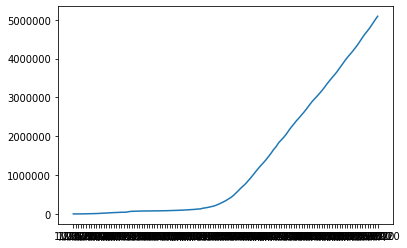

In [37]:
plt.plot(df)

In [18]:
df.tail()

,Infected
5/16/20,4634068
5/17/20,4713620
5/18/20,4801943
5/19/20,4897492
5/20/20,4996472


In [19]:
forecast

5089978

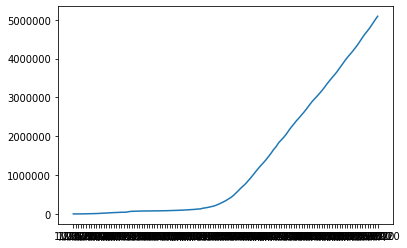

In [27]:
plt.plot(df)
plt.plot(forecast)

In [21]:
df_temp = df

In [22]:
df_temp.loc[d1] = forecast

In [28]:
df_temp

,Infected
1/22/20,555
1/23/20,654
1/24/20,941
1/25/20,1434
1/26/20,2118
...,...
5/17/20,4713620
5/18/20,4801943
5/19/20,4897492
5/20/20,4996472


ValueError: Unrecognized marker style 5089978

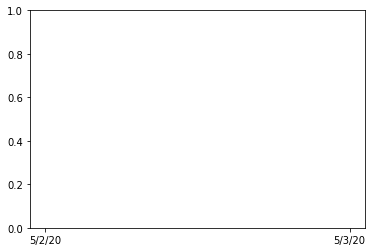

In [38]:
plt.plot(df_temp[-20:], marker=forecast)